## DATA620 - Assignment 3: Graph Visualization

Keith Folsom  
September 17, 2017


This week's assignment is to:  
 
1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.  

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.  

3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.  

4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.  

In previous coursework, I have created citation networks of authors found with published work on PubMed (https://www.ncbi.nlm.nih.gov/pubmed/).

For this week's assignmment, I'm going to use network of authors published in the research area of melanoma.  
This network has been created by determining which authors are citing other authors in their research and publications.

Since this network is fairly large, I've taken a subset of the network but further refine the final network used for metrics and visualization in the steps below.

### Video Link

<video controls src="https://drive.google.com/open?id=0B7Ju9A4G2Qo2anpXcXdmVWoySlU"/> 

In [3]:
# load the necessary packages - networkx, pandas, and matplotlib

import networkx as nx
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
# Reading the citation network data into a pandas data frame

file = "https://raw.githubusercontent.com/kfolsom98/DATA620/master/Assignment3/MM_Network_Subset.csv"
data = pd.read_csv(file,  names=['FromAuthor', 'ToAuthor'], header=0)

data.head(10)

,FromAuthor,ToAuthor
0,E Dean,V Le Coz
1,J Baird,I Mauldin
2,L Khoja,M Rapanotti
3,N Kenawy,C Pandiani
4,D Sebaratnam,J Maj
5,S Suzuki,F Stagnitti
6,J Dobos,J Liu
7,P Triozzi,S Achberger
8,F Ludwig,V Hofschr”er
9,J Curry,M Jurkowska


In [12]:
# Create the network from the edge list stored in the pandas dataframe
G = nx.from_pandas_dataframe(data, 'FromAuthor', 'ToAuthor')

Let's take a look at the citation network:

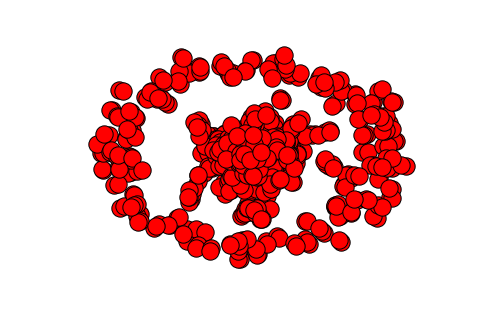

In [13]:
%matplotlib inline

# draw the graph
nx.draw(G)

The resulting network plot shows an inner circle of authors surrounded by an outer ring of unconnected author networks (subgraphs).  Let's get some basic information about the network.

In [17]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 884
Number of edges: 962
Average degree:   2.1765


### What's the diameter of the network?  Diameter is the longest of the shortest paths between nodes.  This measure gives a sense of a network's size.

In [18]:
# Calculate the diameter using the built in network function diameter()
nx.diameter(G)

NetworkXError: Graph not connected: infinite path length

Attempting to calculate the diamater of the network throws an error consistent with what is found in network plot above.  In the melanoma citation network, we see one large networks surrounded by smaller unconnected networks or components. 

This is confirmed by using the is_connected() function below on the network.

In [48]:
print(nx.is_connected(G))

False


### Let's take a look at the subgraphs and identify the largest subgraph to keep for analysis.

In [50]:
graphs = sorted(list(nx.connected_component_subgraphs(G)), key = len, reverse=True)

for x in range(len(graphs)):
    
        print("Index {}:  Nodes = {}; Edges = {}; Diameter = {} ".format(x, 
                                                                        len(nx.nodes(graphs[x])), 
                                                                        len(nx.edges(graphs[x])),
                                                                        nx.diameter(graphs[x])))

Index 0:  Nodes = 609; Edges = 789; Diameter = 18 
Index 1:  Nodes = 7; Edges = 6; Diameter = 4 
Index 2:  Nodes = 7; Edges = 6; Diameter = 4 
Index 3:  Nodes = 6; Edges = 6; Diameter = 3 
Index 4:  Nodes = 5; Edges = 4; Diameter = 4 
Index 5:  Nodes = 5; Edges = 5; Diameter = 3 
Index 6:  Nodes = 5; Edges = 4; Diameter = 3 
Index 7:  Nodes = 5; Edges = 4; Diameter = 4 
Index 8:  Nodes = 4; Edges = 4; Diameter = 3 
Index 9:  Nodes = 4; Edges = 3; Diameter = 2 
Index 10:  Nodes = 4; Edges = 3; Diameter = 2 
Index 11:  Nodes = 4; Edges = 4; Diameter = 3 
Index 12:  Nodes = 3; Edges = 2; Diameter = 2 
Index 13:  Nodes = 3; Edges = 2; Diameter = 2 
Index 14:  Nodes = 3; Edges = 2; Diameter = 2 
Index 15:  Nodes = 3; Edges = 2; Diameter = 2 
Index 16:  Nodes = 3; Edges = 2; Diameter = 2 
Index 17:  Nodes = 3; Edges = 2; Diameter = 2 
Index 18:  Nodes = 3; Edges = 2; Diameter = 2 
Index 19:  Nodes = 3; Edges = 2; Diameter = 2 
Index 20:  Nodes = 3; Edges = 2; Diameter = 2 
Index 21:  Nodes =

We see that there are 111 subgraphs with the subgraph at index 0 being the largest with 609 nodes.  We'll use this for further analysis.

In [52]:
subgraph = graphs[0]  # provide the index to select the graph component to retain.

# alternate/simpler approach below found on:
#  https://programminghistorian.org/lessons/exploring-and-analyzing-network-data-with-python

# then use the max() command to find the largest one:
#components = nx.connected_components(G)
#largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

#subgraph = G.subgraph(largest_component)
#diameter = nx.diameter(subgraph)
#print("Network diameter of largest component:", diameter)

18

### Visualize the Graph 

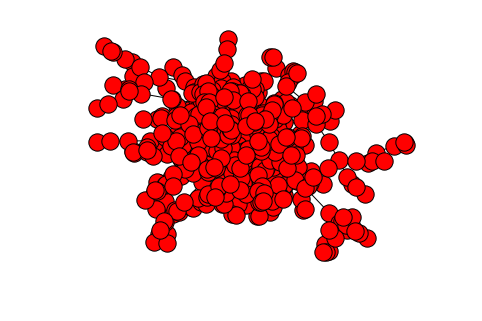

In [53]:
nx.draw(subgraph)

In [23]:
print(nx.info(subgraph))

Name: 
Type: Graph
Number of nodes: 609
Number of edges: 789
Average degree:   2.5911


### Calculate the diameter and the density of the network subgraph.

* Density provides a sense of how closely knit a network is in terms of ratio of actual edges in the network to all possible edges.

In [55]:
diameter = nx.diameter(subgraph)
density = nx.density(subgraph)

print("Network Diameter = {} :  Network density = {}  ".format(diameter, density))

Network Diameter = 18 :  Network density = 0.004261731916  


### Export the citation network subgraph for visualization in Gephi

In [46]:
# Writing the graph as a GML file for use in Gephi
nx.write_gml(subgraph, 'MM_network.gml')

### Initial Gephi Output identifying the top authors in this subgraph

![Gephi](https://raw.githubusercontent.com/kfolsom98/DATA620/master/Assignment3/MM_Network_Subgraph.png)